In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
import re
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import util

# Analysis of answers for `longer_edge_length_prompts`


In [4]:
def read_long_edge_query(fname:str):
    with open(fname, "r") as query_file:
        query_content = query_file.read().split("\n")

    el = [(int(u), int(v)) for (u, v) in ast.literal_eval(query_content[4].split(":")[1].strip())]

    try:
        nr = {
            0 : [int(x) for x in ast.literal_eval(query_content[8].split(":")[1].strip())],
            1 : [int(x) for x in ast.literal_eval(query_content[9].split(":")[1].strip())],
            2 : [int(x) for x in ast.literal_eval(query_content[10].split(":")[1].strip())],
            3 : [int(x) for x in ast.literal_eval(query_content[11].split(":")[1].strip())],
            4 : [int(x) for x in ast.literal_eval(query_content[12].split(":")[1].strip())],
            5 : [int(x) for x in ast.literal_eval(query_content[13].split(":")[1].strip())],
        }
    except:
        nr = {
            0 : [int(x) for x in ast.literal_eval(query_content[8].split(":")[1].strip())],
            1 : [int(x) for x in ast.literal_eval(query_content[9].split(":")[1].strip())],
            2 : [int(x) for x in ast.literal_eval(query_content[10].split(":")[1].strip())],
            3 : [int(x) for x in ast.literal_eval(query_content[11].split(":")[1].strip())],
            4 : [int(x) for x in ast.literal_eval(query_content[12].split(":")[1].strip())],
        }

    return el, nr

## Load and clean the answers -- no reasoning steps

In [5]:
answer_dir = os.path.join("answers", "longer_edge_length_prompts_no_steps")
all_answers = sorted(os.listdir(answer_dir))
print(f"Found {len(all_answers)} answers")

Found 50 answers


In [6]:
answer_is_number = {}
answer_not_number = {}
number_r = re.compile(r"^\d*[.,]?\d*$")

for answer_file in sorted(os.listdir(answer_dir)):
    answer_file_path = os.path.join(answer_dir, answer_file)

    answer_str = open(answer_file_path, "r").read().strip().split("\n")[-1]
    answer_str = answer_str.split()

    found_digit = False
    for sub_str in answer_str:
        if number_r.match(sub_str):
            try:
                answer_is_number[answer_file] = float(sub_str)
                found_digit = True
            except: 
                found_digit = False
                break

    if not found_digit:
        answer_not_number[answer_file] = answer_str

print("Answer is a number:", len(answer_is_number))
print("Answer is not a number:", len(answer_not_number))

print(answer_not_number.keys())


Answer is a number: 47
Answer is not a number: 4
dict_keys(['grafo1629.11.txt', 'grafo2105.10.txt', 'grafo238.10.txt', 'grafo2953.11.txt'])


In [7]:
# we manually analyzed the answers that were harder to parse
answer_is_number["grafo1629.11.txt"] = 10.0
answer_is_number["grafo2105.10.txt"] = 9.0

_ = answer_not_number.pop("grafo1629.11.txt")
_ = answer_not_number.pop("grafo2105.10.txt")


Up to now we only checked if the returned string contained a number. We can now look for the presence of integers (expected) or floats.

In [8]:
answer_integer = {}
answer_float = {}
for answer_file, answer in answer_is_number.items():
    if answer.is_integer():
        answer_integer[answer_file] = int(answer)
    else:
        answer_float[answer_file] = answer

print("Answer is an Integer:", len(answer_integer))
print("Answer is a Float:", len(answer_float))

Answer is an Integer: 48
Answer is a Float: 0


## Load and clean the answers -- with reasoning steps

In [9]:
answer_ws_dir = os.path.join("answers", "longer_edge_length_prompts_steps")
all_answers_ws = sorted(os.listdir(answer_ws_dir))
print(f"Found {len(all_answers_ws)} answers")

answer_ws_is_number = {}
answer_ws_not_number = {}

for answer_ws_file in sorted(os.listdir(answer_ws_dir)):
    answer_ws_file_path = os.path.join(answer_ws_dir, answer_ws_file)

    answer_ws_str = open(answer_ws_file_path, "r").read().strip().split("\n")[-1]
    answer_ws_str = answer_ws_str.split()

    found_digit = False
    for sub_str in answer_ws_str:
        if number_r.match(sub_str):
            try:
                answer_ws_is_number[answer_ws_file] = float(sub_str)
                found_digit = True
            except: 
                found_digit = False
                break

    if not found_digit:
        answer_ws_not_number[answer_ws_file] = answer_ws_str

print("Answer is a number:", len(answer_ws_is_number))
print("Answer is not a number:", len(answer_ws_not_number))

print(answer_ws_not_number.keys())

# we manually analyzed the answers that were harder to parse
answer_ws_is_number["grafo1920.11.txt"] = 37.0
_ = answer_ws_not_number.pop("grafo1920.11.txt")

answer_ws_integer = {}
answer_ws_float = {}
for answer_ws_file, answer in answer_ws_is_number.items():
    if answer.is_integer():
        answer_ws_integer[answer_ws_file] = int(answer)
    else:
        answer_ws_float[answer_ws_file] = answer

print("Answer is an Integer:", len(answer_ws_integer))
print("Answer is a Float:", len(answer_ws_float))

Found 50 answers
Answer is a number: 45
Answer is not a number: 5
dict_keys(['grafo1683.11.txt', 'grafo1822.11.txt', 'grafo1912.11.txt', 'grafo1917.11.txt', 'grafo1920.11.txt'])
Answer is an Integer: 46
Answer is a Float: 0


## Load and clean the answers -- ICL

In [10]:
answers_icl_dir = "answers/longer_edge_length_prompts_icl"
all_answers_icl = sorted(os.listdir(answers_icl_dir))
print(f"Found {len(all_answers_icl)} answers")

answer_icl_is_number = {}
answer_icl_not_number = {}

for answer_icl_file in all_answers_icl:
    answer = open(os.path.join(answers_icl_dir, answer_icl_file), "r").read().strip()
    answer = answer.split("\n")[-1].strip()

    if number_r.match(answer):
        answer_icl_is_number[answer_icl_file] = float(answer)
    else:
        answer_icl_not_number[answer_icl_file] = answer

print("Answer is a number:", len(answer_icl_is_number))
print("Answer is not a number:", len(answer_icl_not_number))
print(answer_icl_not_number.keys())

answer_icl_integer = {}
answer_icl_float = {}
for answer_icl_file, answer in answer_icl_is_number.items():
    if answer.is_integer():
        answer_icl_integer[answer_icl_file] = int(answer)
    else:
        answer_icl_float[answer_icl_file] = answer

print("Answer is an Integer:", len(answer_icl_integer))
print("Answer is a Float:", len(answer_icl_float))

Found 15 answers
Answer is a number: 15
Answer is not a number: 0
dict_keys([])
Answer is an Integer: 15
Answer is a Float: 0


## Results for no reasoning steps

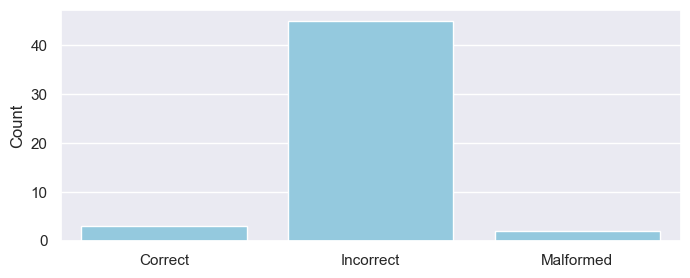

In [11]:
data = {}
data["Correct"] = 0.0
data["Incorrect"] = 0.0
data["Malformed"] = float(len(answer_not_number))

for f in util.read_files(base_path = "rome"):
    # print(f['filename'])
    fname = f['filename'].split("/")[1].replace(".graphml", ".txt")
    if fname not in answer_integer: continue

    query_file = "queries/longer_edge_length_prompts_no_steps/" + f['filename'].split("/")[1].replace(".graphml", ".txt")
    el, nr = read_long_edge_query(query_file)

    if (util.count_edge_length(el, nr) == answer_integer[fname]):
        data["Correct"] += 1
    else: data["Incorrect"] += 1

    # print("Ground truth: {} -- Answer: {}".format(util.count_edge_length(el, nr), answer_integer[fname]))

# Convert the dictionary to a Pandas DataFrame for plotting
df = pd.DataFrame.from_dict(data, orient='index', columns=['Value'])

sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=df.index, y='Value', data=df, color='skyblue')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

## Results with reasoning steps

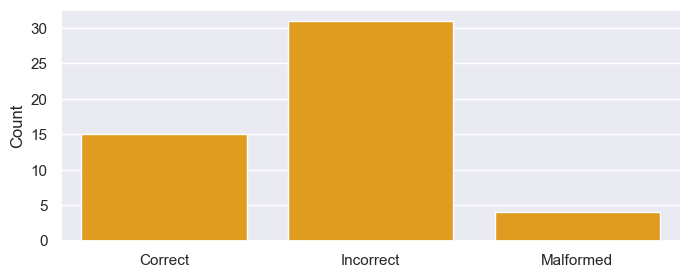

In [12]:
data_ws = {}
data_ws["Correct"] = 0.0
data_ws["Incorrect"] = 0.0
data_ws["Malformed"] = float(len(answer_ws_not_number))

for f in util.read_files(base_path = "rome"):
    # print(f['filename'])
    fname = f['filename'].split("/")[1].replace(".graphml", ".txt")
    if fname not in answer_ws_integer: continue

    query_file = "queries/longer_edge_length_prompts_steps/" + f['filename'].split("/")[1].replace(".graphml", ".txt")
    el, nr = read_long_edge_query(query_file)

    if (util.count_edge_length(el, nr) == answer_ws_integer[fname]):
        data_ws["Correct"] += 1
    else: data_ws["Incorrect"] += 1

    # print("Ground truth: {} -- Answer: {}".format(util.count_edge_length(el, nr), answer_ws_integer[fname]))

# Convert the dictionary to a Pandas DataFrame for plotting
df_ws = pd.DataFrame.from_dict(data_ws, orient='index', columns=['Value'])

sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=df_ws.index, y='Value', data=df_ws, color='orange')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

## Results for ICL

Ground truth: 24 -- Answer: 16
Ground truth: 18 -- Answer: 8
Ground truth: 34 -- Answer: 12
Ground truth: 35 -- Answer: 20
Ground truth: 25 -- Answer: 16
Ground truth: 16 -- Answer: 12
Ground truth: 42 -- Answer: 26
Ground truth: 33 -- Answer: 26
Ground truth: 21 -- Answer: 16
Ground truth: 25 -- Answer: 16
Ground truth: 17 -- Answer: 14
Ground truth: 35 -- Answer: 15
Ground truth: 31 -- Answer: 16
Ground truth: 39 -- Answer: 23
Ground truth: 30 -- Answer: 25


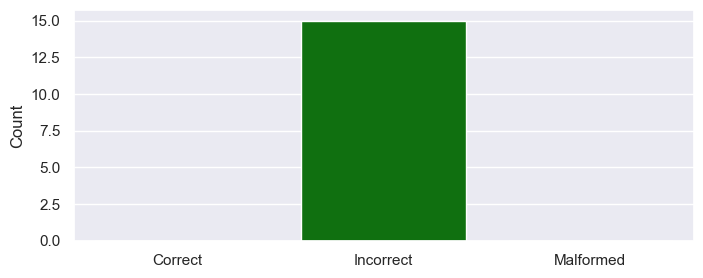

In [13]:
data_icl = {}
data_icl["Correct"] = 0.0
data_icl["Incorrect"] = 0.0
data_icl["Malformed"] = float(len(answer_icl_not_number))

for f in util.read_files(base_path = "rome"):
    # print(f['filename'])
    fname = f['filename'].split("/")[1].replace(".graphml", ".txt")
    if fname not in answer_icl_integer: continue

    # We can read the query from the corresponding file in the simpler format
    query_file = "queries/longer_edge_length_prompts_steps/" + f['filename'].split("/")[1].replace(".graphml", ".txt")
    el, nr = read_long_edge_query(query_file)

    if (util.count_edge_length(el, nr) == answer_icl_integer[fname]):
        data_icl["Correct"] += 1
    else: data_icl["Incorrect"] += 1

    print("Ground truth: {} -- Answer: {}".format(util.count_edge_length(el, nr), answer_icl_integer[fname]))

# Convert the dictionary to a Pandas DataFrame for plotting
df_icl = pd.DataFrame.from_dict(data_icl, orient='index', columns=['Value'])

sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=df_icl.index, y='Value', data=df_icl, color='green')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

## Side by side comparison

In [14]:
df_pt = df / len(all_answers) * 100
df_ws_pt = df_ws / len(all_answers_ws) * 100
df_icl_pt = df_icl / len(all_answers_icl) * 100


df_pt["Type"] = "Standard"
df_ws_pt["Type"] = "Step"
df_icl_pt["Type"] = "ICL"
to_plot = pd.concat([df_pt, df_ws_pt, df_icl_pt]).reset_index()
display(to_plot)

,index,Value,Type
0,Correct,6.0,Standard
1,Incorrect,90.0,Standard
2,Malformed,4.0,Standard
3,Correct,30.0,Step
4,Incorrect,62.0,Step
5,Malformed,8.0,Step
6,Correct,0.0,ICL
7,Incorrect,100.0,ICL
8,Malformed,0.0,ICL


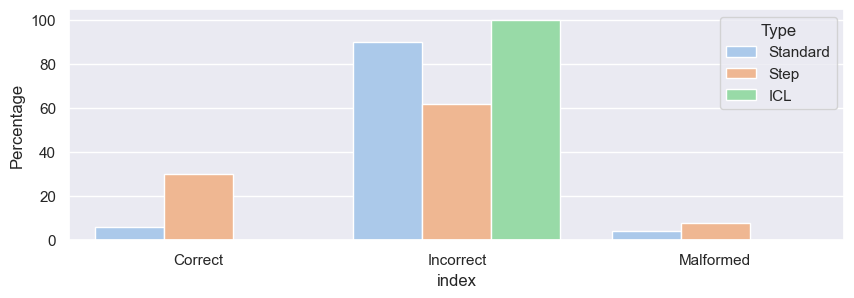

In [15]:
sns.set(rc={'figure.figsize':(10,3)})

sns.barplot(x="index", y='Value', data=to_plot, hue='Type', palette="pastel")

# Set the labels for the x and y axes
plt.ylabel('Percentage')

# Show the plot
plt.show()